#Proyecto de Emisiones Contaminantes en Madrid - Grupo 2

**Integrantes**

- Amada Vargas
- Felipe Bravo
- Sebastián Garrido 
- Patricio Zuñiga
- Camilo Valenzuela

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib notebook

In [2]:
diccionario_estacion = {'1': 'P°. Recoletos','2': 'Glta. de Carlos V','35': 'Pza. del Carmen', '4': 'Pza. de España',
                        '39': 'Barrio del Pilar', '6': 'Pza. Dr. Marañón', '7': 'Pza. M. de Salamanca','8': 'Escuelas Aguirre',
                        '9': 'Pza. Luca de Tena', '38': 'Cuatro Caminos', '11': 'Av. Ramón y Cajal','12': 'Pza. Manuel Becerra',
                        '40': 'Vallecas', '14': 'Pza. Fdez. Ladreda', '15': 'Pza. Castilla', '16': 'Arturo Soria','17': 'Villaverde Alto',
                        '18': 'Calle Farolillo', '19': 'Huerta Castañeda', '36': 'Moratalaz', '21': 'Pza. Cristo Rey',
                        '22': 'Po. Pontones', '23': 'Final C/ Alcalá', '24': 'Casa de Campo', '25': 'Santa Eugenia',
                        '26': 'Urb. Embajada (Barajas)', '27': 'Barajas', '47': 'Méndez Álvaro','48': 'Po. Castellana','49': 'Retiro',
                        '50': 'Pza. Castilla', '54': 'Ensanche Vallecas', '55': 'Urb. Embajada (Barajas)', '56': 'Plaza Elíptica',
                        '57': 'Sanchinarro', '58': 'El Pardo','59': 'Parque Juan Carlos I', '60': 'Tres Olivos', 
                        '10':'Partículas < 10 µm'}

diccionario_contaminante = {'1':'Dióxido de Azufre','6':'Monóxido de Carbono', '9':'Partículas < 2.5 µm', '10':'Partículas < 10 µm',
                            '12':'Óxidos de Nitrógeno', '14':'Ozono', '20':'Tolueno', '30':'Benceno', '35':'Etilbenceno',
                            '37':'Metaxileno', '38':'Paraxileno', '39':'Ortoxileno', '42':'Hidrocarburos totales(hexano)',
                            '43':'Metano', '44':'Hidrocarburosno metánicos (hexano)', '7':"Monóxido de Nitrógeno", '8':'Dióxido de Nitrógeno'}


1. Generar un DataFrame con los datos de los cuatro ficheros

In [5]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Subiendo el archivo "{name}" que pesa {length} bytes'.format(
name=fn, length=len(uploaded[fn])))

Saving emisiones-2016.csv to emisiones-2016.csv
Saving emisiones-2017.csv to emisiones-2017.csv
Saving emisiones-2018.csv to emisiones-2018.csv
Saving emisiones-2019.csv to emisiones-2019.csv
Subiendo el archivo "emisiones-2016.csv" que pesa 511773 bytes
Subiendo el archivo "emisiones-2017.csv" que pesa 511773 bytes
Subiendo el archivo "emisiones-2018.csv" que pesa 510081 bytes
Subiendo el archivo "emisiones-2019.csv" que pesa 518565 bytes


In [4]:
#Solución
emision_2016 = pd.read_csv('/content/emisiones-2016.csv', sep=';')
emision_2017 = pd.read_csv('/content/emisiones-2017.csv', sep=';')
emision_2018 = pd.read_csv('/content/emisiones-2018.csv', sep=';')
emision_2019 = pd.read_csv('/content/emisiones-2019.csv', sep=';')

concatenar_emisiones = [emision_2016, emision_2017, emision_2018, emision_2019]
emisiones_general = pd.concat(concatenar_emisiones)
emisiones_general

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2016,1,8.0,V,7.0,...,9.0,V,7.0,V,8.0,V,9.0,V,9.0,V
1,28,79,4,1,28079004_1_38,2016,2,12.0,V,13.0,...,7.0,V,8.0,V,9.0,V,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2016,3,11.0,V,10.0,...,8.0,V,7.0,V,8.0,V,10.0,V,8.0,V
3,28,79,4,1,28079004_1_38,2016,4,8.0,V,9.0,...,9.0,V,8.0,V,8.0,V,8.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2016,5,7.0,V,8.0,...,7.0,V,7.0,V,7.0,V,7.0,V,7.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,28,79,60,14,28079060_14_6,2019,8,94.0,V,104.0,...,88.0,V,90.0,V,99.0,V,108.0,V,98.0,V
1832,28,79,60,14,28079060_14_6,2019,9,88.0,V,82.0,...,54.0,V,68.0,V,70.0,V,55.0,V,0.0,N
1833,28,79,60,14,28079060_14_6,2019,10,44.0,V,75.0,...,28.0,V,33.0,V,16.0,V,19.0,V,47.0,V
1834,28,79,60,14,28079060_14_6,2019,11,41.0,V,55.0,...,55.0,V,52.0,V,47.0,V,56.0,V,0.0,N


2. Filtrar las columnas del DataFrame para quedarse con las columnas ESTACION, MAGNITUD, AÑO, MES y las correspondientes a los días D01, D02, etc.

In [ ]:
#Solución
new = []
columnas = emisiones_general.columns.tolist()
for c in columnas:
  if c.startswith('P') or c.startswith('MUN') or c.startswith('V'):
    new.append(c)
limpio = emisiones_general.drop(new, axis=1)
limpio

,ESTACION,MAGNITUD,ANO,MES,D01,D02,D03,D04,D05,D06,...,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
0,4,1,2016,1,8.0,7.0,6.0,6.0,7.0,6.0,...,10.0,11.0,11.0,13.0,12.0,9.0,7.0,8.0,9.0,9.0
1,4,1,2016,2,12.0,13.0,9.0,9.0,11.0,9.0,...,11.0,10.0,9.0,8.0,7.0,7.0,8.0,9.0,0.0,0.0
2,4,1,2016,3,11.0,10.0,9.0,9.0,7.0,8.0,...,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,10.0,8.0
3,4,1,2016,4,8.0,9.0,9.0,8.0,8.0,9.0,...,8.0,8.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0,0.0
4,4,1,2016,5,7.0,8.0,9.0,9.0,8.0,8.0,...,7.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,60,14,2019,8,94.0,104.0,106.0,99.0,77.0,82.0,...,86.0,97.0,104.0,96.0,85.0,88.0,90.0,99.0,108.0,98.0
1832,60,14,2019,9,88.0,82.0,80.0,92.0,79.0,75.0,...,59.0,46.0,49.0,69.0,57.0,54.0,68.0,70.0,55.0,0.0
1833,60,14,2019,10,44.0,75.0,44.0,54.0,65.0,68.0,...,37.0,39.0,45.0,21.0,23.0,28.0,33.0,16.0,19.0,47.0
1834,60,14,2019,11,41.0,55.0,79.0,65.0,64.0,51.0,...,38.0,75.0,69.0,45.0,35.0,55.0,52.0,47.0,56.0,0.0


3. Reestructurar el DataFrame para que los valores de los contaminantes de las columnas de los días aparezcan en una única columna.

In [ ]:
#Solución
columnas = limpio.columns.tolist()
column = columnas[:4]
nuevo = pd.melt(limpio, id_vars=column, var_name='DIAS', value_name='VALOR')
nuevo

,ESTACION,MAGNITUD,ANO,MES,DIAS,VALOR
0,4,1,2016,1,D01,8.0
1,4,1,2016,2,D01,12.0
2,4,1,2016,3,D01,11.0
3,4,1,2016,4,D01,8.0
4,4,1,2016,5,D01,7.0
...,...,...,...,...,...,...
225241,60,14,2019,8,D31,98.0
225242,60,14,2019,9,D31,0.0
225243,60,14,2019,10,D31,47.0
225244,60,14,2019,11,D31,0.0


4. Añadir una columna con la fecha a partir de la concatenación del año, el mes y el día (usar el módulo datetime).

Pandas cuenta con libreria de datetime, por lo que se guió en el siguiente enlace sobre la documentación de pandas:

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [ ]:
#Solución
nuevo["DIAS"] = nuevo["DIAS"].str.strip('D')
nuevo["FECHA"] = nuevo["ANO"].astype(str) + "-" + nuevo["MES"].astype(str) + "-" + nuevo["DIAS"]
nuevo['FECHA'] = pd.to_datetime(nuevo['FECHA'], format='%Y/%m/%d', errors='coerce')
nuevo

,ESTACION,MAGNITUD,ANO,MES,DIAS,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016-01-01
1,4,1,2016,2,01,12.0,2016-02-01
2,4,1,2016,3,01,11.0,2016-03-01
3,4,1,2016,4,01,8.0,2016-04-01
4,4,1,2016,5,01,7.0,2016-05-01
...,...,...,...,...,...,...,...
225241,60,14,2019,8,31,98.0,2019-08-31
225242,60,14,2019,9,31,0.0,NaT
225243,60,14,2019,10,31,47.0,2019-10-31
225244,60,14,2019,11,31,0.0,NaT


In [ ]:
#Pruebas con librería Pandas con strip
lst = ["DAA","DAD","AAD", "ADA", "AAA", "DDA"]
df = pd.DataFrame(lst, columns = ['Ejemplo'])
df["Ejemplo"].str.strip('D')

0     AA
1      A
2     AA
3    ADA
4    AAA
5      A
Name: Ejemplo, dtype: object

5. Eliminar las filas con fechas no válidas (utilizar la función isnat del módulo numpy) y ordenar el DataFrame por estaciones, contaminantes y fecha.

In [ ]:
#Prueba con libreria Numpy con isnat
np.isnat(nuevo["FECHA"])

0         False
1         False
2         False
3         False
4         False
          ...  
225241    False
225242     True
225243    False
225244     True
225245    False
Name: FECHA, Length: 225246, dtype: bool

In [ ]:
#Solución
#nuevo = nuevo.dropna(subset=["FECHA"]) # Forma 1 con dropnan

nuevo = nuevo.drop(nuevo[np.isnat(nuevo["FECHA"])].index) # Forma 2 con np.isnat, requerimiento del ejercicio
nuevo = nuevo.sort_values(['ESTACION', 'MAGNITUD','FECHA']).reset_index(drop = True)
nuevo

,ESTACION,MAGNITUD,ANO,MES,DIAS,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016-01-01
1,4,1,2016,1,02,7.0,2016-01-02
2,4,1,2016,1,03,6.0,2016-01-03
3,4,1,2016,1,04,6.0,2016-01-04
4,4,1,2016,1,05,7.0,2016-01-05
...,...,...,...,...,...,...,...
221153,60,14,2019,12,27,17.0,2019-12-27
221154,60,14,2019,12,28,13.0,2019-12-28
221155,60,14,2019,12,29,14.0,2019-12-29
221156,60,14,2019,12,30,5.0,2019-12-30


6. Mostrar por pantalla las estaciones y los contaminantes disponibles en el DataFrame.

In [ ]:
#Solución
contaminantes_disp = nuevo["MAGNITUD"].unique() #Se obtiene los codigos que contiene
estacion_disp  = nuevo["ESTACION"].unique()

print("Los contaminantes disponibles en los archivos son: ")
for contaminante in contaminantes_disp:
  print(str(contaminante) + " - " + str(diccionario_contaminante[str(contaminante)]))


print("\nLas estaciones disponibles en los archivos son: ")
for estacion in estacion_disp :
  print(str(estacion) + " - " + str(diccionario_estacion[str(estacion)]))

Los contaminantes disponibles en los archivos son: 
1 - Dióxido de Azufre
6 - Monóxido de Carbono
7 - Monóxido de Nitrógeno
8 - Dióxido de Nitrógeno
12 - Óxidos de Nitrógeno
9 - Partículas < 2.5 µm
10 - Partículas < 10 µm
14 - Ozono
20 - Tolueno
30 - Benceno
35 - Etilbenceno
42 - Hidrocarburos totales(hexano)
43 - Metano
44 - Hidrocarburosno metánicos (hexano)

Las estaciones disponibles en los archivos son: 
4 - Pza. de España
8 - Escuelas Aguirre
11 - Av. Ramón y Cajal
16 - Arturo Soria
17 - Villaverde Alto
18 - Calle Farolillo
24 - Casa de Campo
27 - Barajas
35 - Pza. del Carmen
36 - Moratalaz
38 - Cuatro Caminos
39 - Barrio del Pilar
40 - Vallecas
47 - Méndez Álvaro
48 - Po. Castellana
49 - Retiro
50 - Pza. Castilla
54 - Ensanche Vallecas
55 - Urb. Embajada (Barajas)
56 - Plaza Elíptica
57 - Sanchinarro
58 - El Pardo
59 - Parque Juan Carlos I
60 - Tres Olivos


7. Mostrar un resumen descriptivo (mímino, máximo, media, etc) para cada contaminante.

Pandas cuenta con libreria de groupby, por lo que se guió en el siguiente enlace sobre la documentación de pandas:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [ ]:
#Solución
nuevo.groupby(['MAGNITUD']).VALOR.describe() #Dado que las otras columnas son solo codigos y fechas, se eligió valor

,count,mean,std,min,25%,50%,75%,max
MAGNITUD,,,,,,,,
1,14610.0,7.428953,7.012504,0.00,4.00,7.00,10.00,610.00
6,14610.0,0.350233,0.215935,0.00,0.20,0.30,0.40,14.90
7,35064.0,20.446412,135.123509,0.00,4.00,9.00,23.00,24742.00
8,35064.0,37.677618,20.118050,0.00,22.00,35.00,50.00,148.00
9,8948.0,10.087729,10.643591,0.00,6.00,9.00,13.00,850.00
10,17897.0,18.772923,35.723619,0.00,10.00,16.00,24.00,4481.00
12,35064.0,67.959417,61.443940,0.00,29.00,48.00,84.00,1005.00
14,20454.0,49.941772,24.753120,0.00,31.00,52.00,69.00,336.00
20,8766.0,2.364944,4.236706,0.00,0.80,1.60,2.80,195.00


8. Mostrar un resumen descriptivo para cada contaminente por distritos.

In [ ]:
#Solución
nuevo.groupby(['ESTACION','MAGNITUD']).VALOR.describe() #Dado que las otras columnas son solo codigos y fechas, se eligió valor

count       mean        std  min   25%   50%    75%    max
ESTACION MAGNITUD                                                             
4        1         1461.0   7.329911  16.379050  1.0   4.0   7.0    9.0  610.0
         6         1461.0   0.411499   0.172902  0.1   0.3   0.4    0.5    1.3
         7         1461.0  31.939767  37.667968  0.0   8.0  16.0   42.0  239.0
         8         1461.0  44.398357  17.766063  0.0  31.0  43.0   55.0  105.0
         12        1461.0  93.341547  72.436531  0.0  44.0  69.0  119.0  467.0
...                   ...        ...        ...  ...   ...   ...    ...    ...
60       7         1461.0  12.326489  19.593109  1.0   2.0   4.0   12.0  151.0
         8         1461.0  31.125941  18.101896  3.0  18.0  27.0   41.0  101.0
         10        1461.0  17.033539  12.205022  1.0   9.0  14.0   21.0  215.0
         12        1461.0  50.023956  45.933843  6.0  22.0  33.0   60.0  328.0
         14        1461.0  60.718001  26.309952  4.0  42.0  65.0   81.0  119.0

[153 rows x 8 columns]

9. Crear una función que reciba una estación y un contaminante y devuelva un resumen descriptivo de las
emisiones del contaminante indicado en la estadión indicada.

In [ ]:
#Solución
'''
Se crea una función con lambda, donde recibe los siguientes parámetros, según el orden:
1) estacion
2) contaminante
3) df (dataframe)
Retorna un resumen descriptivo de las emisiones del contaminante
'''
resumen_estacion_contaminante = lambda estacion, contaminante, df: df[(df["ESTACION"] == estacion) & (df["MAGNITUD"] == contaminante)].VALOR.describe()
try:
  es = abs(int(input("Ingrese el código de estación, vease a punto 6: ")))
  con = abs(int(input("Ingrese el código de contaminación, vease a punto 6: ")))
  print("\nResumen descriptivo\n", resumen_estacion_contaminante(es, con, nuevo))
except ValueError:
  print("Error en el ingreso de las notas, debe ser entero, vuelve a intentar.")

Ingrese el código de estación, vease a punto 6: 4
Ingrese el código de contaminación, vease a punto 6: 1

Resumen descriptivo
 count    1461.000000
mean        7.329911
std        16.379050
min         1.000000
25%         4.000000
50%         7.000000
75%         9.000000
max       610.000000
Name: VALOR, dtype: float64


10. Crear una función que reciba una estación de medición y una magnitud y devuelva una lista con todas las mediciones de la magnitud en la estación.

In [ ]:
#Solución
'''
Se crea una función con lambda, donde recibe los siguientes parámetros, según el orden:
1) e (estacion)
2) c (contaminante)
3) df (dataframe)
Retorna una lista de la columna "VALOR", mediciones de la magnitud de 
contaminación, según corresponda la estación y contaminante
'''

lista_mediciones = lambda e, c, df: list(df[(df['ESTACION'] == e) & (df['MAGNITUD'] == c)].VALOR)

#Dado que los códigos
try:
  es = abs(int(input("Ingrese el código de estación, vease a punto 6: ")))
  con = abs(int(input("Ingrese el código de contaminación, vease a punto 6: ")))
  print(lista_mediciones(es, con, nuevo))
except ValueError:
  print("Error en el ingreso de las notas, debe ser entero, vuelve a intentar.")

Ingrese el código de estación, vease a punto 6: 50
Ingrese el código de contaminación, vease a punto 6: 12
[80.0, 78.0, 67.0, 64.0, 99.0, 51.0, 64.0, 84.0, 71.0, 44.0, 108.0, 145.0, 205.0, 240.0, 70.0, 65.0, 103.0, 124.0, 209.0, 218.0, 171.0, 159.0, 125.0, 122.0, 167.0, 154.0, 188.0, 149.0, 65.0, 84.0, 90.0, 217.0, 214.0, 74.0, 72.0, 119.0, 98.0, 61.0, 89.0, 70.0, 74.0, 95.0, 71.0, 49.0, 49.0, 81.0, 68.0, 131.0, 74.0, 57.0, 71.0, 79.0, 129.0, 141.0, 156.0, 124.0, 104.0, 57.0, 56.0, 89.0, 195.0, 145.0, 105.0, 122.0, 71.0, 70.0, 82.0, 82.0, 128.0, 78.0, 57.0, 78.0, 55.0, 55.0, 93.0, 164.0, 107.0, 84.0, 63.0, 55.0, 44.0, 68.0, 70.0, 53.0, 95.0, 65.0, 38.0, 71.0, 85.0, 114.0, 67.0, 75.0, 58.0, 62.0, 113.0, 69.0, 67.0, 77.0, 62.0, 76.0, 48.0, 78.0, 94.0, 93.0, 110.0, 109.0, 62.0, 55.0, 40.0, 51.0, 72.0, 107.0, 105.0, 87.0, 30.0, 85.0, 93.0, 108.0, 59.0, 54.0, 42.0, 20.0, 33.0, 51.0, 89.0, 52.0, 75.0, 55.0, 40.0, 72.0, 74.0, 109.0, 92.0, 114.0, 65.0, 43.0, 29.0, 79.0, 106.0, 64.0, 71.0, 76.0

In [ ]:
#Verificación del ejercicio
nuevo[(nuevo['ESTACION'] == 50) & (nuevo['MAGNITUD'] == 12)]

,ESTACION,MAGNITUD,ANO,MES,DIAS,VALOR,FECHA
163449,50,12,2016,1,01,80.0,2016-01-01
163450,50,12,2016,1,02,78.0,2016-01-02
163451,50,12,2016,1,03,67.0,2016-01-03
163452,50,12,2016,1,04,64.0,2016-01-04
163453,50,12,2016,1,05,99.0,2016-01-05
...,...,...,...,...,...,...,...
164905,50,12,2019,12,27,106.0,2019-12-27
164906,50,12,2019,12,28,135.0,2019-12-28
164907,50,12,2019,12,29,151.0,2019-12-29
164908,50,12,2019,12,30,185.0,2019-12-30


11. Crear una función que reciba un rango de fechas y una estación de medición y genere un gráfico con la evolución diaria de las magnitudes de esa estación en las fechas indicadas.

Ingrese la fecha de inicio, en formato 'Año-Mes-Dia' (Ej: 2018-01-01): 2018-01-01
Ingrese la fecha de inicio, en formato Año-Mes-Dia (Ej: 2018-03-31): 2018-01-29
Ingrese el código de estación, vease a punto 6: 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


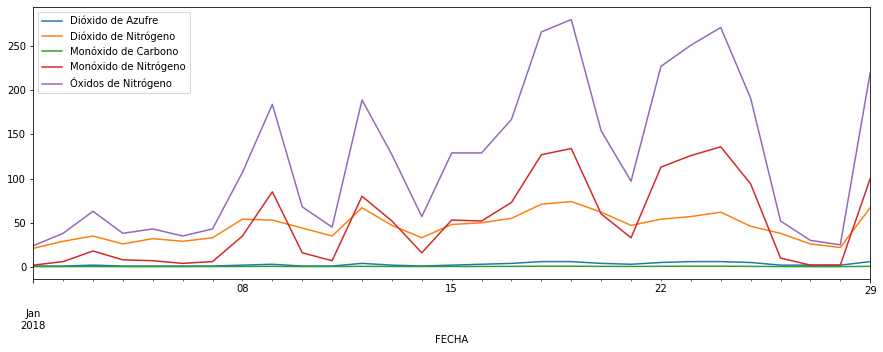

In [ ]:
#Solución
'''
Se crea una función "rango_f_magnitud" donde recibe los siguientes parámetros, según el orden:
1) data (dataframe). IMPORTANTE, la columna "FECHA" debe ser de tipo datetime
2) fecha_inicio (Fecha de comienzo del rango)
3) fecha_termino (Fecha de termino del rango)
4) estacion
Esta función y genere un gráfico con la evolución diaria de las magnitudes de esa estación en las fechas indicadas.
'''

def rango_f_magnitud(data, fecha_inicio, fecha_termino, estacion):
  data = data[(data['ESTACION'] == estacion) & (data['FECHA'] >= fecha_inicio) & (data['FECHA'] <= fecha_termino)]
  data['NOMBRE CONTAMINACION'] = data['MAGNITUD'].apply(lambda x: diccionario_contaminante[str(x)]) 
  data.set_index('FECHA', inplace = True) #Se reemplaza el index por la fecha
  data.groupby('NOMBRE CONTAMINACION').VALOR.plot(figsize=(15, 5) , legend = True)
  plt.savefig("Grafico_evolucion_diaria_estacion_"+ str(estacion) +".jpg") #Permite guardar el gráfico
  plt.show()

try:
  inicio = input("Ingrese la fecha de inicio, en formato 'Año-Mes-Dia' (Ej: 2018-01-01): ")
  final = input("Ingrese la fecha de inicio, en formato Año-Mes-Dia (Ej: 2018-03-31): ")
  est = abs(int(input("Ingrese el código de estación, vease a punto 6: "))) #Codigo estacion es mayor que 0
  rango_f_magnitud(nuevo, inicio, final, est)

except: #Dado que puede desplegar distintos tipos de errores, no se ingresa tipo de error
  print("Error con el ingreso de datos, vuelve a intentarlo.")

12. Crear una función que reciba un mes y una magnitud y devuelva un diccionario con las medias de la magnitud dentro de Madrid Central y fuera de ella.

In [ ]:
#Solución
'''
Se crea una función "dict_medida", donde recibe los siguientes parámetros, según el orden:
1) df (dataframe).
2) magnitud (contaminaciójn)
3) mes
Esta función retorna un diccionario con las medias en las mediciones de contaminación, 
según la magnitud y el mes correspondiente.  
'''

def dict_medidas(df, magnitud, mes):
  dicc = df[(df.MAGNITUD == magnitud) & (df.MES == mes)].groupby(['ESTACION', 'MES']).mean()
  dicc2 = dicc.drop('ANO', axis=1)

  for key, value in dicc2.items():
    dicc2[key] = round(value, 2)


  dicc3 = dicc2.to_dict('dict')
  return dicc3

try:
  con= abs(int(input("Ingrese el código de estación, vease a punto 6: "))) #Codigo estacion es mayor que 0
  month = abs(int(input("Ingrese el mes donde deseas extraer medidas de la magnitud: ")))
  x = dict_medidas(nuevo, con, month)
  print("\nFormato del diccionario\n (ESTACION, MES): MAGNITUD/VALOR\n")
  for i in x.keys():
    print(i," : ",x[i])

except ValueError: #Dado que puede desplegar distintos tipos de errores, no se ingresa tipo de error
  print("Error con el ingreso de datos, vuelve a intentarlo.")

Ingrese el código de estación, vease a punto 6: 6
Ingrese el mes donde deseas extraer medidas de la magnitud: 2

Formato del diccionario
 (ESTACION, MES): MAGNITUD/VALOR

MAGNITUD  :  {(4, 2): 6.0, (8, 2): 6.0, (16, 2): 6.0, (18, 2): 6.0, (24, 2): 6.0, (35, 2): 6.0, (36, 2): 6.0, (39, 2): 6.0, (56, 2): 6.0, (57, 2): 6.0}
VALOR  :  {(4, 2): 0.47, (8, 2): 0.4, (16, 2): 0.39, (18, 2): 0.48, (24, 2): 0.26, (35, 2): 0.45, (36, 2): 0.42, (39, 2): 0.41, (56, 2): 0.45, (57, 2): 0.37}
